<a href="https://colab.research.google.com/github/oskargirardin/CRP_GDPR_datasets/blob/master/use_cases/fraud_detection/fraud_detection_CRP_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory work - Improving an Insurance Fraud Detection model using GANs
Starting from a baseline fraud detection (classification) model, the aim is to improve the performance through:

- Increasing training data size by generating synthetic data using Generative Adversarial Networks.
- Bonus: Exploring how the adversarial component of the GAN can detect fraud.

Questions:
- How is synthetic data generation to increase training data size better than upsampling, that usually improves model performance by rebalancing the classes? To answer, it is important to consider the efficiency but also the privacy side. How does upsampling create additional examples from the minority class?

Notebook credits for baseline fraud detection (classification) model: https://www.kaggle.com/code/max398434434/insurance-fraud-eda-and-model 

### Loading libraries and packages

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# import libraries for modelling
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [2]:
#we are using a dataset from kaggle. Don't forget to load a kaggle.json file before running this cell
! pip install kaggle

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!kaggle datasets download -d incarnyx/car-insurance-fraud

  0% 0.00/1.82M [00:00<?, ?B/s]
100% 1.82M/1.82M [00:00<00:00, 175MB/s]


In [4]:
!unzip car-insurance-fraud.zip

Archive:  car-insurance-fraud.zip
  inflating: Dataset.xlsx            


### Car insurance fraud data loading

In [5]:
df = pd.read_excel("Dataset.xlsx")

In [6]:
pd.set_option('display.max_columns', None)
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21.0,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1.0,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,55526.069421
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4.0,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,59294.455571
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3.0,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,71756.941320
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65.0,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2.0,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,7584.153493
4,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,36.0,Third Party,Sport - Collision,Sport,more than 69000,0,7,14,400,1.0,more than 30,more than 30,1,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,98545.374339


### Data Preparation




In [4]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year,ClaimSize
count,11565.000000,11565.000000,11560.000000,11565.000000,11565.000000,11565.000000,11565.000000,11559.000000,11565.000000,11565.000000
mean,2.784003,2.701167,39.899567,0.059230,7710.474449,8.469780,407.617812,2.493468,1994.865975,22955.978035
std,1.284854,1.258153,13.590556,0.236066,4453.762219,4.618952,43.397393,1.118102,0.801798,26988.811719
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000,0.000000
25%,2.000000,2.000000,31.000000,0.000000,3851.000000,4.000000,400.000000,1.000000,1994.000000,4148.845001
50%,3.000000,3.000000,38.000000,0.000000,7712.000000,8.000000,400.000000,3.000000,1995.000000,8130.994563
75%,4.000000,4.000000,49.000000,0.000000,11542.000000,12.000000,400.000000,3.000000,1996.000000,46299.646944
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000,141394.159289


In [ ]:
df.isna().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     5
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            6
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
ClaimSize               0
dtype: int64

In [7]:
df = df.dropna(axis = 0)

In [ ]:
len(df)

11554

#### Basic cleaning/analysis of the data

**Fraud / No Fraud**

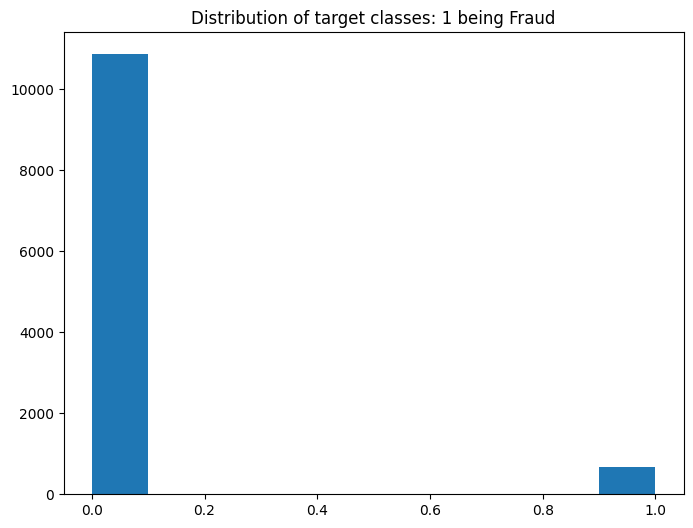

In [6]:
plt.figure(figsize = (8,6))
plt.hist(df['FraudFound_P'])
plt.title("Distribution of target classes: 1 being Fraud")
plt.show()

Pretty imbalanced.

In [7]:
noffound = len(df[df['FraudFound_P']==0])
ffound = len(df[df['FraudFound_P']==1])
print("Data points where there is no fraud found: ", noffound, "\n Data points where there is fraud found: ", ffound)

Data points where there is no fraud found:  10869 
 Data points where there is fraud found:  685


In [8]:
noffound-ffound

10184

**Age**

In [9]:
df.groupby('Age').size().reset_index(name='count').sort_values('Age')

,Age,count
0,0.0,253
1,16.0,8
2,17.0,5
3,18.0,34
4,19.0,24
...,...,...
61,76.0,32
62,77.0,20
63,78.0,26
64,79.0,12


Perhaps the Age at 0 is to account for individuals who did not give their age. Although it's 253 data points, its best to remove them for now.

In [8]:
df = df[df['Age'] > 0.0]

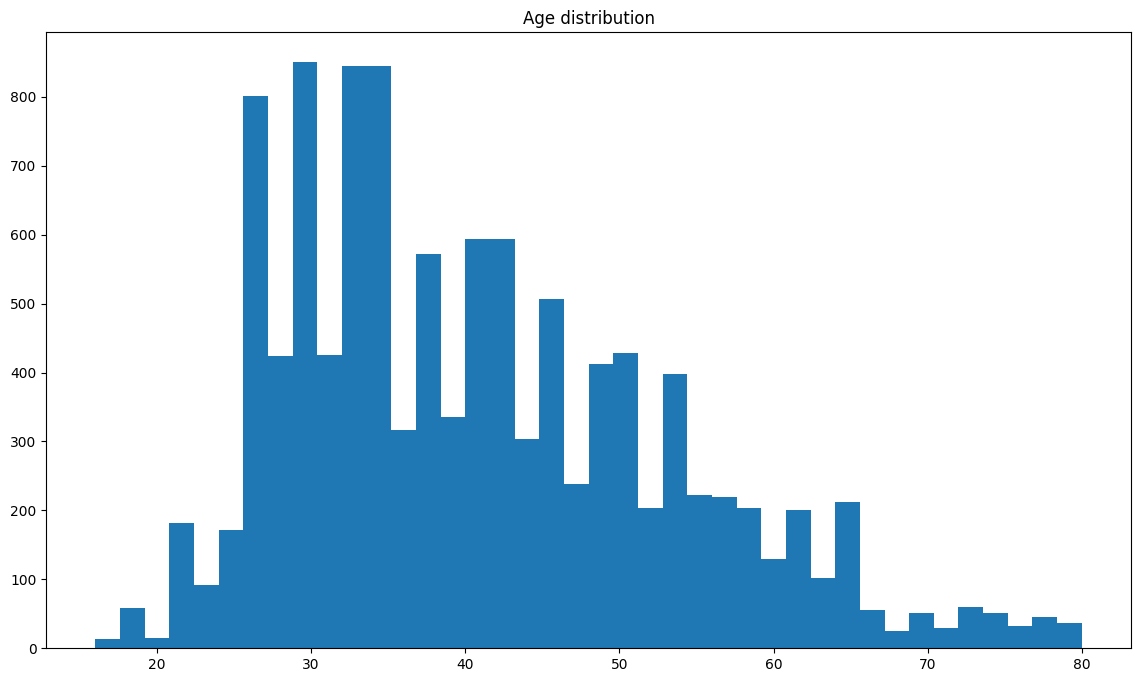

In [11]:
plt.figure(figsize = (14, 8))
plt.hist(x = df['Age'], bins = 40)
plt.title('Age distribution')
plt.show()

**Policy Number**

In [12]:
len(df['PolicyNumber'].unique())/len(df)

1.0

Seems like Policy Number is unique. Could it behave like an identifier?

**Year**

In [13]:
df['Year'].unique()

array([1994, 1995, 1996])

The data is only spread accross 3 years, 27-29 years ago... The aim is to improve a fraud detection model though, so it should be okay.

In [14]:
df.groupby('Year').size().reset_index(name='count').sort_values('Year')

,Year,count
0,1994,4468
1,1995,3844
2,1996,2989


The years are not too imabalanced, but could be improved.

**Claimsize**

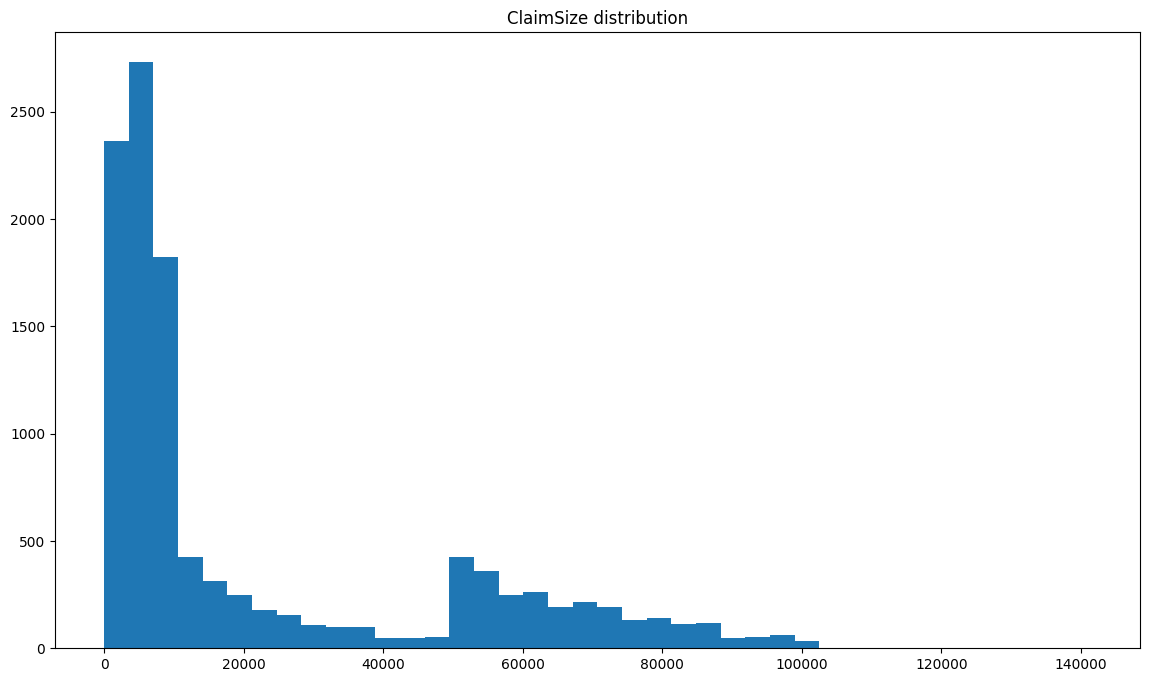

In [15]:
plt.figure(figsize = (14, 8))
plt.hist(x = df['ClaimSize'], bins = 40)
plt.title('ClaimSize distribution')
plt.show()

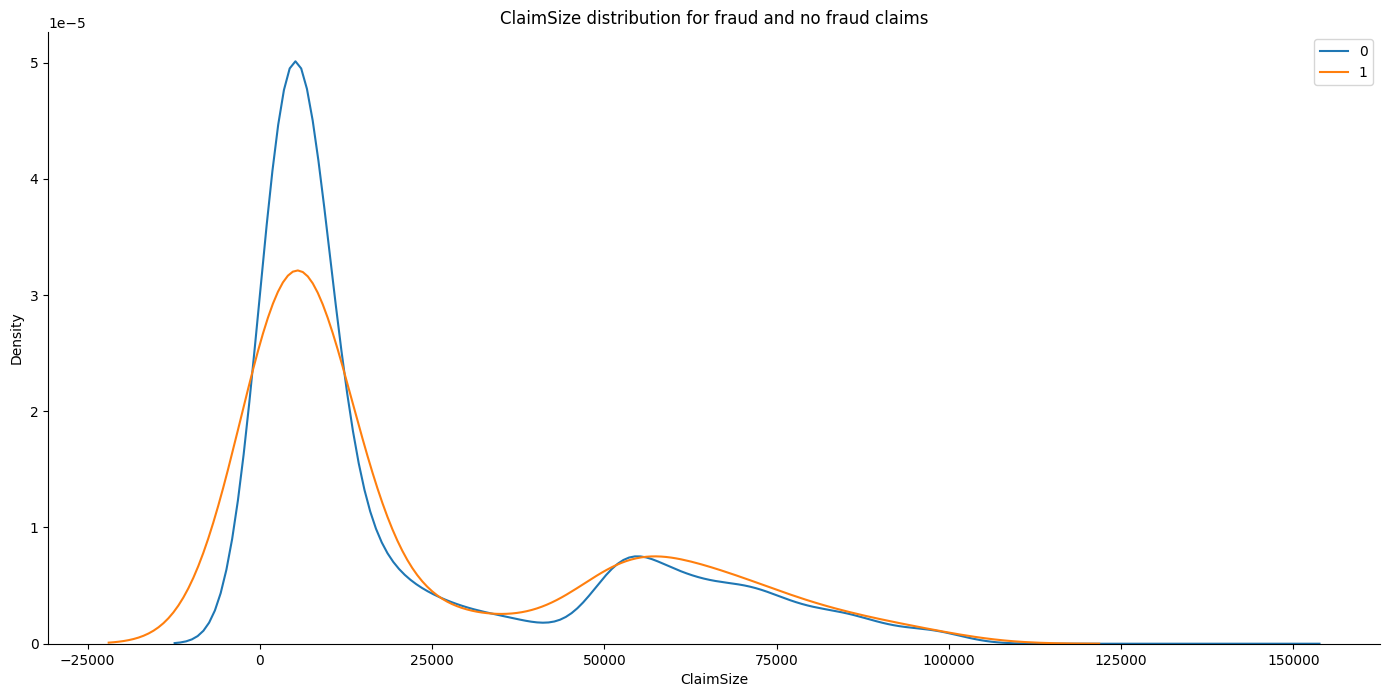

In [16]:
g = sns.FacetGrid(df, hue='FraudFound_P', height = 7, aspect = 2)
g.map(sns.kdeplot, 'ClaimSize')
plt.title('ClaimSize distribution for fraud and no fraud claims')
plt.legend()
plt.show()

**Car Model**

In [17]:
fraud_rate_make = df.groupby('Make').agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_make.columns = ['FraudRate', '#']
fraud_rate_make = fraud_rate_make.apply(lambda x: round(x, 3))
fraud_rate_make.sort_values(by='FraudRate',ascending=False)

,FraudRate,#
Make,,
Mecedes,0.333,3
Accura,0.127,354
Saturn,0.098,41
Saab,0.087,69
Ford,0.074,338
Toyota,0.061,2315
Chevrolet,0.060,1252
Mercury,0.059,68
Honda,0.057,1909


The type of car make also seems to be pretty inbalanced.

**Policy Type**

In [18]:
fraud_rate_pt = df.groupby('PolicyType').agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_pt.columns = ['FraudRate', '#']
fraud_rate_pt = fraud_rate_pt.apply(lambda x: round(x, 3))
fraud_rate_pt.sort_values(by='FraudRate',ascending=False)

,FraudRate,#
PolicyType,,
Sport - Collision,0.130,261
Utility - All Perils,0.127,245
Utility - Collision,0.125,24
Sedan - All Perils,0.097,2987
Sedan - Collision,0.067,4129
Sedan - Liability,0.007,3629
Sport - All Perils,0.000,12
Sport - Liability,0.000,1
Utility - Liability,0.000,13


#### Ordinal encoding

**Months**

In [9]:
months = {
    'Jan' : 1,
    'Feb' : 2,
    'Mar' : 3,
    'Apr' : 4,
    'May' : 5,
    'Jun' : 6,
    'Jul' : 7,
    'Aug' : 8,
    'Sep' : 9, 
    'Oct' : 10,
    'Nov' : 11,
    'Dec' : 12
          }
months_proc = lambda x: months.get(x, 0)

df['Month'] = df['Month'].apply(months_proc)
df['MonthClaimed'] = df['MonthClaimed'].apply(months_proc)

**Day of the week**

In [10]:
D_o_w = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
          }
D_o_w_proc = lambda x: D_o_w.get(x, 0)

df['DayOfWeek'] = df['DayOfWeek'].apply(D_o_w_proc)
df['DayOfWeekClaimed'] = df['DayOfWeekClaimed'].apply(D_o_w_proc)

**Vehicle price**

Ordinal Encoding because classes have relative importance.

In [11]:
vehicle_prices = {
    'less than 20000': 1,
    '20000 to 29000' : 2,
    '30000 to 39000' : 3,
    '40000 to 59000' : 4,
    '60000 to 69000' : 5,
    'more than 69000': 6,
          }
vehicle_price_proc = lambda x: vehicle_prices.get(x, 0)

df['VehiclePrice'] = df['VehiclePrice'].apply(vehicle_price_proc)

**Age of Vehicle**

Also ordinal encoding

In [12]:
AgeOfVehicle_variants = {
    'new'         : 0.5,
    '2 years'     : 2,
    '3 years'     : 3,
    '4 years'     : 4,
    '5 years'     : 5,
    '6 years'     : 6,
    '7 years'     : 7,
    'more than 7' : 8.5,
          }
vehicle_age_proc = lambda x: AgeOfVehicle_variants[x]

df['AgeOfVehicle'] = df['AgeOfVehicle'].apply(vehicle_age_proc)

**Age of Policy Holder**

Also ordinal encoding.

In [13]:
age_variants = {
    '16 to 17'     : 1,
    '18 to 20'     : 2,
    '21 to 25'     : 3,
    '26 to 30'     : 4,
    '31 to 35'     : 5,
    '36 to 40'     : 6,
    '41 to 50'     : 7,
    '51 to 65'     : 8,
    'over 65'      : 9,
          }
age_proc = lambda x: age_variants[x]

df['AgeOfPolicyHolder'] = df['AgeOfPolicyHolder'].apply(age_proc)

#### One hot encoding

Creating a function to get the dummy variables for object type variables.

In [14]:
#this function creates the dummies for 1 column
def create_dummy(col, df):
    df_dummy = pd.get_dummies(df[col], drop_first = True)
    df_dummy.columns = ['dum: ' + str(col) + ': ' + str(name) for name in df_dummy.columns]
    return df_dummy

#this function uses the previous function to create dummies for all columns that need them
def dummies(df):
    dummy_df = pd.DataFrame()
    object_cols = df.columns[df.dtypes == object]
    for col in object_cols:
        dummy_df = pd.concat([dummy_df, create_dummy(col, df)], axis = 1)
    
    df_out = pd.concat([df.drop(columns = object_cols), dummy_df.astype('int32')], axis = 1)
    return df_out.sort_index(ascending=False, axis=1)

In [15]:
df = dummies(df)

In [ ]:
df.dtypes

dum: WitnessPresent: Yes                  int32
dum: VehicleCategory: Utility             int32
dum: VehicleCategory: Sport               int32
dum: Sex: Male                            int32
dum: PolicyType: Utility - Liability      int32
                                         ...   
DayOfWeek                                 int64
ClaimSize                               float64
AgeOfVehicle                            float64
AgeOfPolicyHolder                         int64
Age                                     float64
Length: 76, dtype: object

In [10]:
df.head()

,dum: WitnessPresent: Yes,dum: VehiclePrice: more than 69000,dum: VehiclePrice: less than 20000,dum: VehiclePrice: 60000 to 69000,dum: VehiclePrice: 40000 to 59000,dum: VehiclePrice: 30000 to 39000,dum: VehicleCategory: Utility,dum: VehicleCategory: Sport,dum: Sex: Male,dum: PolicyType: Utility - Liability,...,Year,WeekOfMonthClaimed,WeekOfMonth,RepNumber,PolicyNumber,FraudFound_P,DriverRating,Deductible,ClaimSize,Age
0,0,1,0,0,0,0,0,1,0,0,...,1994,1,5,12,1,0,1.0,300,55526.069421,21.0
1,0,1,0,0,0,0,0,1,1,0,...,1994,4,3,15,2,0,4.0,400,59294.455571,34.0
2,0,1,0,0,0,0,0,1,1,0,...,1994,2,5,7,3,0,3.0,400,71756.941320,47.0
3,0,0,0,0,0,0,0,1,1,0,...,1994,1,2,4,4,0,2.0,400,7584.153493,65.0
4,0,1,0,0,0,0,0,1,1,0,...,1994,3,1,14,7,0,1.0,400,98545.374339,36.0


In [26]:
len(df.columns)

76

#### Feature selection

We can see that later

#### Splitting the data

In [16]:
data, validation = train_test_split(df, test_size = 0.3, random_state = 42)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data.drop("FraudFound_P", axis = 1), 
                                                    data["FraudFound_P"], 
                                                    test_size = 0.3, 
                                                    random_state = 42)

### Models

#### Logistic Regression

In [18]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

def eval_result(model, X_test, y_test, validation = False):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")

        pred = model.predict(X_test)

        print("\n", classification_report(y_test, pred, target_names = ['Not Fraud', 'Fraud']), "\n")

        display(pd.DataFrame(confusion_matrix(y_test, pred), 
                         columns = ['Predicted Not Fraud', 'Predicted Fraud'],
                         index = ['Not Fraud', 'Fraud']))
        
        print("\n")
        if hasattr(model, 'feature_importances_') and not validation:
            features = pd.DataFrame({
                'Variable'  :X_test.columns,
                'Importance':model.feature_importances_
            })
            features.sort_values('Importance', ascending=False, inplace=True)
            display(features.head(20))

        fpr, tpr, _ = roc_curve(y_test, pred)
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(6,6))
        plt.plot(fpr, tpr, color='darkred', label='ROC curve (area = %0.3f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='lightgray', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic Curve')
        plt.legend(loc="lower right")
        plt.show()


               precision    recall  f1-score   support

   Not Fraud       0.95      0.94      0.94      2252
       Fraud       0.07      0.08      0.07       121

    accuracy                           0.90      2373
   macro avg       0.51      0.51      0.51      2373
weighted avg       0.91      0.90      0.90      2373
 



,Predicted Not Fraud,Predicted Fraud
Not Fraud,2115,137
Fraud,111,10


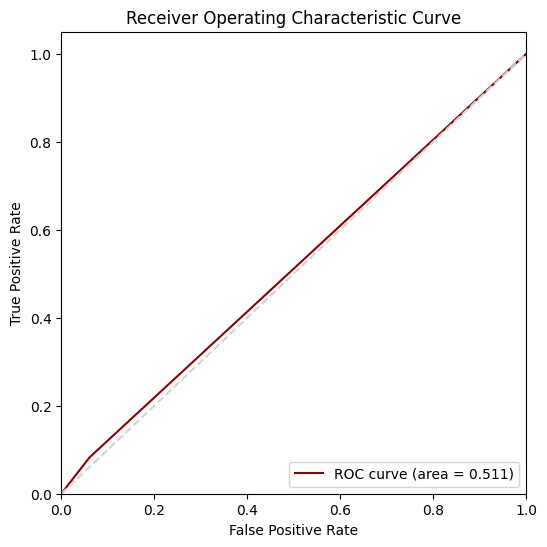

In [30]:
lgmodel = LogisticRegression(
    solver='lbfgs', 
    class_weight={0:1.0, 1:9.5},
    n_jobs = -1,
    random_state = 101
)
lgmodel.fit(X_train, y_train)
eval_result(lgmodel, X_test, y_test)

#### Decision Tree Classifier


               precision    recall  f1-score   support

   Not Fraud       0.96      0.95      0.95      2298
       Fraud       0.22      0.27      0.24       129

    accuracy                           0.91      2427
   macro avg       0.59      0.61      0.60      2427
weighted avg       0.92      0.91      0.91      2427
 



,Predicted Not Fraud,Predicted Fraud
Not Fraud,2172,126
Fraud,94,35


,Variable,Importance
65,PolicyNumber,0.167247
72,ClaimSize,0.089912
75,Age,0.075403
66,MonthClaimed,0.069456
67,Month,0.068297
71,DayOfWeek,0.057856
58,dum: AddressChange_Claim: 2 to 3 years,0.045657
64,RepNumber,0.041270
70,DayOfWeekClaimed,0.029535
74,AgeOfPolicyHolder,0.029456


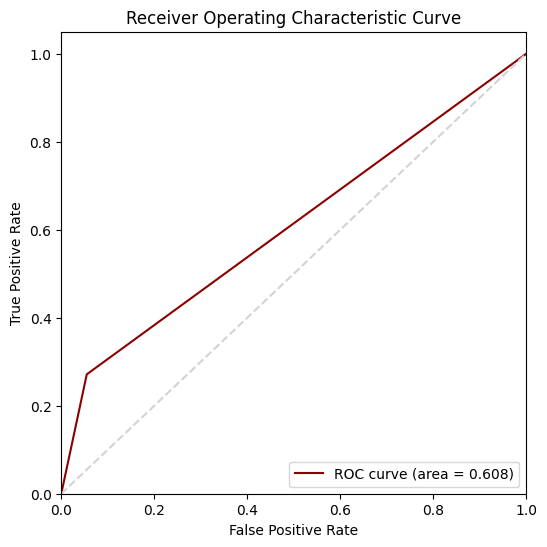

In [ ]:
dtc = DecisionTreeClassifier(random_state = 101)
dtc.fit(X_train, y_train)
eval_result(dtc, X_test, y_test)

#### XGBoost Classifier


               precision    recall  f1-score   support

   Not Fraud       0.98      0.96      0.97      2252
       Fraud       0.45      0.57      0.50       121

    accuracy                           0.94      2373
   macro avg       0.71      0.77      0.74      2373
weighted avg       0.95      0.94      0.95      2373
 



,Predicted Not Fraud,Predicted Fraud
Not Fraud,2168,84
Fraud,52,69


,Variable,Importance
51,dum: BasePolicy: Liability,0.286395
57,dum: AddressChange_Claim: 2 to 3 years,0.120161
44,dum: Fault: Third Party,0.116442
29,dum: Make: Saab,0.029724
54,dum: AddressChange_Claim: under 6 months,0.026033
12,dum: PoliceReportFiled: Yes,0.025290
5,dum: PolicyType: Utility - Collision,0.020354
56,dum: AddressChange_Claim: 4 to 8 years,0.019566
64,PolicyNumber,0.018908
65,MonthClaimed,0.016459


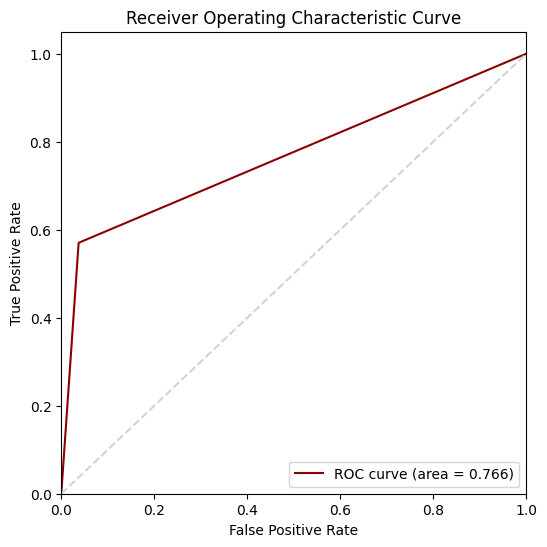

In [19]:
xgbr = XGBClassifier(
    random_state = 1,
    n_jobs = -1,
    scale_pos_weight = 20,
    eval_metric = 'logloss'
)
xgbr.fit(X_train, y_train)
eval_result(xgbr, X_test, y_test)

### Validation of the model

In [20]:
X_val = validation.drop('FraudFound_P', axis = 1)
y_val = validation['FraudFound_P']


               precision    recall  f1-score   support

   Not Fraud       0.97      0.98      0.97      3183
       Fraud       0.58      0.50      0.54       208

    accuracy                           0.95      3391
   macro avg       0.77      0.74      0.75      3391
weighted avg       0.94      0.95      0.95      3391
 



,Predicted Not Fraud,Predicted Fraud
Not Fraud,3108,75
Fraud,104,104


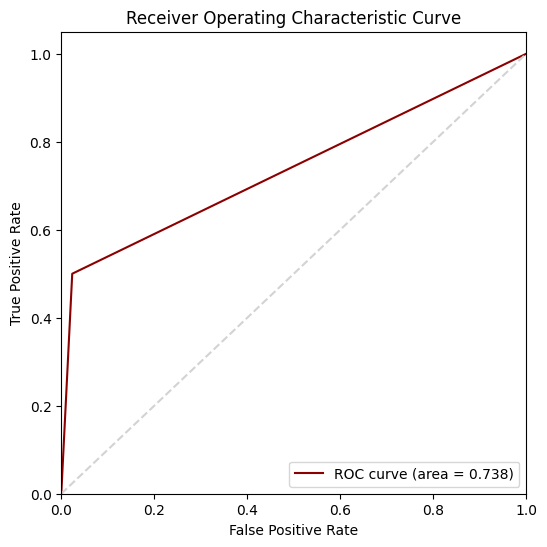

In [21]:
eval_result(xgbr, X_val, y_val, validation = True)

### Using GANs to make the dataset balanced

Only the target variable first

In [22]:
fraud_df = data[data['FraudFound_P']==1]
fraud_df = fraud_df.drop('FraudFound_P', axis = 1)

In [23]:
len(fraud_df)

451

In [ ]:
len(data)

7910

In [ ]:
7910-451

7459

Install and import ctgan 

In [25]:
!pip install ctgan 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 79.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.1 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.0
    Uninstalling packaging-23.0:
      Successfully uninstalled packaging-23.0
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0+cu118
    Uninstallin

In [26]:
from ctgan import CTGAN

#create list of discrete columns
discrete = ['dum: WitnessPresent: Yes',
 'dum: VehicleCategory: Utility',
 'dum: VehicleCategory: Sport',
 'dum: Sex: Male',
 'dum: PolicyType: Utility - Liability',
 'dum: PolicyType: Utility - Collision',
 'dum: PolicyType: Utility - All Perils',
 'dum: PolicyType: Sport - Liability',
 'dum: PolicyType: Sport - Collision',
 'dum: PolicyType: Sport - All Perils',
 'dum: PolicyType: Sedan - Liability',
 'dum: PolicyType: Sedan - Collision',
 'dum: PoliceReportFiled: Yes',
 'dum: PastNumberOfClaims: none',
 'dum: PastNumberOfClaims: more than 4',
 'dum: PastNumberOfClaims: 2 to 4',
 'dum: NumberOfSuppliments: none',
 'dum: NumberOfSuppliments: more than 5',
 'dum: NumberOfSuppliments: 3 to 5',
 'dum: NumberOfCars: more than 8',
 'dum: NumberOfCars: 5 to 8',
 'dum: NumberOfCars: 3 to 4',
 'dum: NumberOfCars: 2 vehicles',
 'dum: MaritalStatus: Widow',
 'dum: MaritalStatus: Single',
 'dum: MaritalStatus: Married',
 'dum: Make: VW',
 'dum: Make: Toyota',
 'dum: Make: Saturn',
 'dum: Make: Saab',
 'dum: Make: Porche',
 'dum: Make: Pontiac',
 'dum: Make: Nisson',
 'dum: Make: Mercury',
 'dum: Make: Mecedes',
 'dum: Make: Mazda',
 'dum: Make: Lexus',
 'dum: Make: Jaguar',
 'dum: Make: Honda',
 'dum: Make: Ford',
 'dum: Make: Ferrari',
 'dum: Make: Dodge',
 'dum: Make: Chevrolet',
 'dum: Make: BMW',
 'dum: Fault: Third Party',
 'dum: Days_Policy_Claim: more than 30',
 'dum: Days_Policy_Claim: 8 to 15',
 'dum: Days_Policy_Accident: none',
 'dum: Days_Policy_Accident: more than 30',
 'dum: Days_Policy_Accident: 8 to 15',
 'dum: Days_Policy_Accident: 15 to 30',
 'dum: BasePolicy: Liability',
 'dum: BasePolicy: Collision',
 'dum: AgentType: Internal',
 'dum: AddressChange_Claim: under 6 months',
 'dum: AddressChange_Claim: no change',
 'dum: AddressChange_Claim: 4 to 8 years',
 'dum: AddressChange_Claim: 2 to 3 years',
 'dum: AccidentArea: Urban',
 'Year',
 'WeekOfMonthClaimed',
 'WeekOfMonth',
 'VehiclePrice',
 'RepNumber',
 'PolicyNumber',
 'MonthClaimed',
 'Month',
 'DriverRating',
 'DayOfWeekClaimed',
 'DayOfWeek',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'Age']

In [36]:
ctgan = CTGAN(verbose=True)
ctgan.fit(fraud_df, discrete, epochs = 200)

Epoch 1, Loss G:  0.9794,Loss D:  0.0228
Epoch 2, Loss G:  0.9964,Loss D: -0.1086
Epoch 3, Loss G:  1.0590,Loss D: -0.2506
Epoch 4, Loss G:  1.2337,Loss D: -0.4432
Epoch 5, Loss G:  1.4084,Loss D: -0.6576
Epoch 6, Loss G:  1.4989,Loss D: -0.8047
Epoch 7, Loss G:  1.4777,Loss D: -1.0863
Epoch 8, Loss G:  1.5370,Loss D: -1.2876
Epoch 9, Loss G:  1.6328,Loss D: -1.5733
Epoch 10, Loss G:  1.7071,Loss D: -1.9035
Epoch 11, Loss G:  1.6413,Loss D: -1.9073
Epoch 12, Loss G:  1.5819,Loss D: -1.9882
Epoch 13, Loss G:  1.5256,Loss D: -1.8859
Epoch 14, Loss G:  1.4646,Loss D: -2.0039
Epoch 15, Loss G:  1.4500,Loss D: -1.9808
Epoch 16, Loss G:  1.2710,Loss D: -1.8417
Epoch 17, Loss G:  1.3594,Loss D: -1.6480
Epoch 18, Loss G:  1.2458,Loss D: -1.7060
Epoch 19, Loss G:  1.2910,Loss D: -1.6843
Epoch 20, Loss G:  1.1370,Loss D: -1.4154
Epoch 21, Loss G:  0.8855,Loss D: -1.5060
Epoch 22, Loss G:  1.0268,Loss D: -1.3046
Epoch 23, Loss G:  1.0760,Loss D: -1.3759
Epoch 24, Loss G:  1.1761,Loss D: -1.2846
E

In [31]:
def augmented_dataset_generation(model, og_dataset, p):
  n0 = len(og_dataset[og_dataset['FraudFound_P']==0])
  n1 = int(n0*p)
  samples = model.sample(n1)
  samples['FraudFound_P'] = 1
  augmented = pd.concat([samples,og_dataset],ignore_index=True, axis = 0)
  augmented = augmented.sample(frac=1).reset_index(drop=True)
  return augmented


In [37]:
augmented10 = augmented_dataset_generation(ctgan, data, 0.1)
augmented30 = augmented_dataset_generation(ctgan, data, 0.3)
augmented50 = augmented_dataset_generation(ctgan, data, 0.5)
augmented80 = augmented_dataset_generation(ctgan, data, 0.8)
augmented100 = augmented_dataset_generation(ctgan, data, 1)

#### augmented generation

In [36]:
samples = ctgan.sample(1000)

In [30]:
int(2.3)

2

In [37]:
samples

,dum: WitnessPresent: Yes,dum: VehicleCategory: Utility,dum: VehicleCategory: Sport,dum: Sex: Male,dum: PolicyType: Utility - Liability,dum: PolicyType: Utility - Collision,dum: PolicyType: Utility - All Perils,dum: PolicyType: Sport - Liability,dum: PolicyType: Sport - Collision,dum: PolicyType: Sport - All Perils,dum: PolicyType: Sedan - Liability,dum: PolicyType: Sedan - Collision,dum: PoliceReportFiled: Yes,dum: PastNumberOfClaims: none,dum: PastNumberOfClaims: more than 4,dum: PastNumberOfClaims: 2 to 4,dum: NumberOfSuppliments: none,dum: NumberOfSuppliments: more than 5,dum: NumberOfSuppliments: 3 to 5,dum: NumberOfCars: more than 8,dum: NumberOfCars: 5 to 8,dum: NumberOfCars: 3 to 4,dum: NumberOfCars: 2 vehicles,dum: MaritalStatus: Widow,dum: MaritalStatus: Single,dum: MaritalStatus: Married,dum: Make: VW,dum: Make: Toyota,dum: Make: Saturn,dum: Make: Saab,dum: Make: Porche,dum: Make: Pontiac,dum: Make: Nisson,dum: Make: Mercury,dum: Make: Mecedes,dum: Make: Mazda,dum: Make: Lexus,dum: Make: Jaguar,dum: Make: Honda,dum: Make: Ford,dum: Make: Ferrari,dum: Make: Dodge,dum: Make: Chevrolet,dum: Make: BMW,dum: Fault: Third Party,dum: Days_Policy_Claim: more than 30,dum: Days_Policy_Claim: 8 to 15,dum: Days_Policy_Accident: none,dum: Days_Policy_Accident: more than 30,dum: Days_Policy_Accident: 8 to 15,dum: Days_Policy_Accident: 15 to 30,dum: BasePolicy: Liability,dum: BasePolicy: Collision,dum: AgentType: Internal,dum: AddressChange_Claim: under 6 months,dum: AddressChange_Claim: no change,dum: AddressChange_Claim: 4 to 8 years,dum: AddressChange_Claim: 2 to 3 years,dum: AccidentArea: Urban,Year,WeekOfMonthClaimed,WeekOfMonth,VehiclePrice,RepNumber,PolicyNumber,MonthClaimed,Month,DriverRating,Deductible,DayOfWeekClaimed,DayOfWeek,ClaimSize,AgeOfVehicle,AgeOfPolicyHolder,Age
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1995,3,2,6,5,1738,6,1,1.0,404,3,6,6938.661415,7.0,5,38.0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,1995,2,5,1,5,4376,6,10,2.0,398,1,5,10284.561327,8.5,6,29.0
2,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1994,1,2,6,5,11079,2,8,2.0,402,3,6,8586.001988,7.0,5,38.0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1994,3,5,3,7,539,4,7,1.0,403,2,5,3143.464423,4.0,8,60.0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1995,4,2,4,16,12416,8,6,4.0,397,3,1,12471.645391,7.0,7,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1995,4,1,6,5,14224,3,12,3.0,399,1,6,10126.757327,7.0,5,31.0
996,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,1995,1,4,2,16,2852,2,3,1.0,398,3,1,2004.218867,7.0,8,29.0
997,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1995,1,5,1,13,2293,5,4,1.0,398,4,1,14675.812795,7.0,6,39.0
998,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1996,1,4,6,5,3054,11,7,1.0,396,1,1,13749.505467,7.0,5,60.0


In [38]:
samples['FraudFound_P'] = 1
samples['FraudFound_P']

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: FraudFound_P, Length: 1000, dtype: int64

In [39]:
augmented = pd.concat([samples,data],ignore_index=True, axis = 0)
#augmented['synthetic'] = np.where(augmented.index<7000,1,0)
augmented = augmented.sample(frac=1).reset_index(drop=True)

In [40]:
augmented

,dum: WitnessPresent: Yes,dum: VehicleCategory: Utility,dum: VehicleCategory: Sport,dum: Sex: Male,dum: PolicyType: Utility - Liability,dum: PolicyType: Utility - Collision,dum: PolicyType: Utility - All Perils,dum: PolicyType: Sport - Liability,dum: PolicyType: Sport - Collision,dum: PolicyType: Sport - All Perils,dum: PolicyType: Sedan - Liability,dum: PolicyType: Sedan - Collision,dum: PoliceReportFiled: Yes,dum: PastNumberOfClaims: none,dum: PastNumberOfClaims: more than 4,dum: PastNumberOfClaims: 2 to 4,dum: NumberOfSuppliments: none,dum: NumberOfSuppliments: more than 5,dum: NumberOfSuppliments: 3 to 5,dum: NumberOfCars: more than 8,dum: NumberOfCars: 5 to 8,dum: NumberOfCars: 3 to 4,dum: NumberOfCars: 2 vehicles,dum: MaritalStatus: Widow,dum: MaritalStatus: Single,dum: MaritalStatus: Married,dum: Make: VW,dum: Make: Toyota,dum: Make: Saturn,dum: Make: Saab,dum: Make: Porche,dum: Make: Pontiac,dum: Make: Nisson,dum: Make: Mercury,dum: Make: Mecedes,dum: Make: Mazda,dum: Make: Lexus,dum: Make: Jaguar,dum: Make: Honda,dum: Make: Ford,dum: Make: Ferrari,dum: Make: Dodge,dum: Make: Chevrolet,dum: Make: BMW,dum: Fault: Third Party,dum: Days_Policy_Claim: more than 30,dum: Days_Policy_Claim: 8 to 15,dum: Days_Policy_Accident: none,dum: Days_Policy_Accident: more than 30,dum: Days_Policy_Accident: 8 to 15,dum: Days_Policy_Accident: 15 to 30,dum: BasePolicy: Liability,dum: BasePolicy: Collision,dum: AgentType: Internal,dum: AddressChange_Claim: under 6 months,dum: AddressChange_Claim: no change,dum: AddressChange_Claim: 4 to 8 years,dum: AddressChange_Claim: 2 to 3 years,dum: AccidentArea: Urban,Year,WeekOfMonthClaimed,WeekOfMonth,VehiclePrice,RepNumber,PolicyNumber,MonthClaimed,Month,DriverRating,Deductible,DayOfWeekClaimed,DayOfWeek,ClaimSize,AgeOfVehicle,AgeOfPolicyHolder,Age,FraudFound_P
0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,1,1994,1,5,2,6,3061,5,4,3.0,500,2,7,9474.514134,8.5,9,76.0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1996,1,1,2,9,11806,1,1,2.0,400,4,2,1941.519680,7.0,7,54.0,0
2,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,1994,3,3,3,4,3511,6,6,3.0,400,2,5,16144.673632,7.0,5,29.0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1995,3,1,2,5,6035,1,3,3.0,400,3,3,9090.956542,7.0,5,26.0,1
4,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,1995,1,3,3,2,10161,8,7,4.0,400,3,3,15790.507668,6.0,5,35.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8905,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1996,2,2,6,4,13717,1,1,4.0,400,3,1,92790.336713,8.5,8,58.0,0
8906,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1995,4,5,2,12,7160,9,4,4.0,404,4,4,12935.473617,8.5,5,39.0,1
8907,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,1994,2,1,6,12,6112,6,6,2.0,400,2,1,74391.153047,7.0,6,44.0,0
8908,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1995,2,1,3,7,11229,10,10,3.0,400,5,3,19533.618622,5.0,7,54.0,0


#### Comparing performance of models

Does the performance increase? Is GANs method performing better than other methods, such as upsampling and downsampling?


               precision    recall  f1-score   support

   Not Fraud       0.97      0.96      0.97      3183
       Fraud       0.52      0.61      0.56       208

    accuracy                           0.94      3391
   macro avg       0.75      0.78      0.76      3391
weighted avg       0.95      0.94      0.94      3391
 



,Predicted Not Fraud,Predicted Fraud
Not Fraud,3067,116
Fraud,82,126


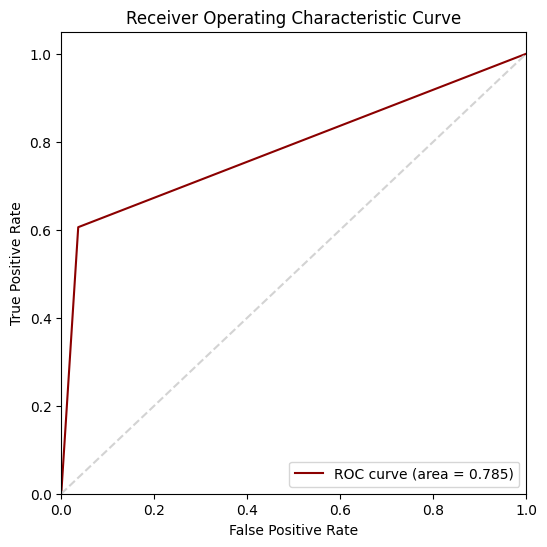




               precision    recall  f1-score   support

   Not Fraud       0.98      0.96      0.97      3183
       Fraud       0.49      0.63      0.55       208

    accuracy                           0.94      3391
   macro avg       0.73      0.80      0.76      3391
weighted avg       0.95      0.94      0.94      3391
 



,Predicted Not Fraud,Predicted Fraud
Not Fraud,3047,136
Fraud,76,132


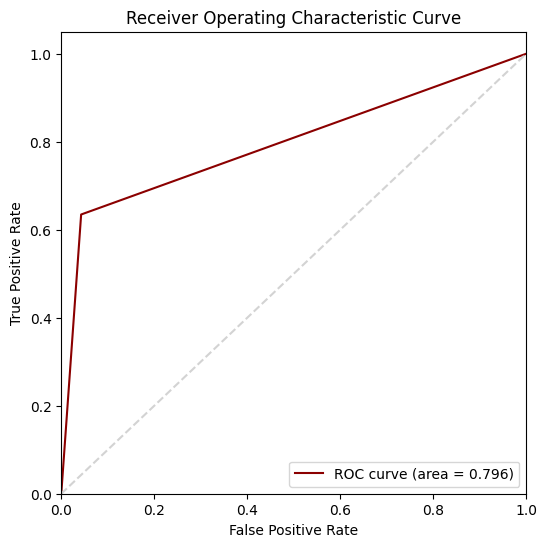




               precision    recall  f1-score   support

   Not Fraud       0.98      0.96      0.97      3183
       Fraud       0.52      0.67      0.59       208

    accuracy                           0.94      3391
   macro avg       0.75      0.82      0.78      3391
weighted avg       0.95      0.94      0.95      3391
 



,Predicted Not Fraud,Predicted Fraud
Not Fraud,3055,128
Fraud,68,140


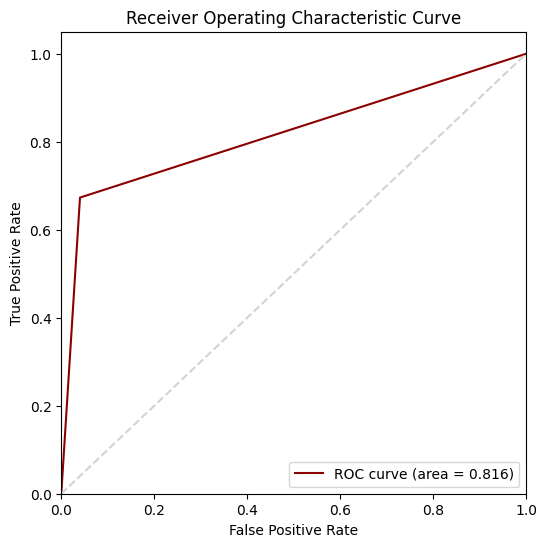




               precision    recall  f1-score   support

   Not Fraud       0.98      0.96      0.97      3183
       Fraud       0.51      0.69      0.58       208

    accuracy                           0.94      3391
   macro avg       0.74      0.82      0.78      3391
weighted avg       0.95      0.94      0.94      3391
 



,Predicted Not Fraud,Predicted Fraud
Not Fraud,3042,141
Fraud,64,144


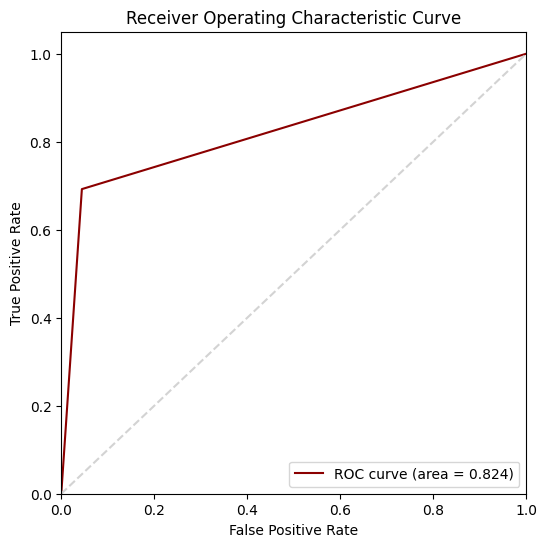




               precision    recall  f1-score   support

   Not Fraud       0.98      0.96      0.97      3183
       Fraud       0.51      0.70      0.59       208

    accuracy                           0.94      3391
   macro avg       0.74      0.83      0.78      3391
weighted avg       0.95      0.94      0.94      3391
 



,Predicted Not Fraud,Predicted Fraud
Not Fraud,3041,142
Fraud,62,146


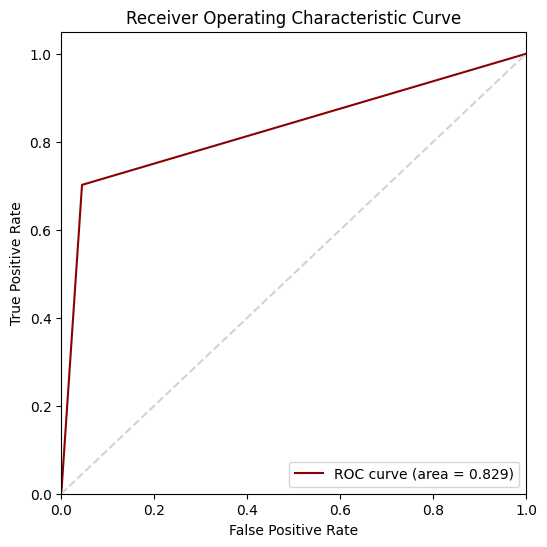

In [38]:
xgbr_2 = XGBClassifier(
    random_state = 1,
    n_jobs = -1,
    scale_pos_weight = 20,
    eval_metric = 'logloss'
)

l_datasets = [augmented10,augmented30,augmented50,augmented80,augmented100]

for d in l_datasets:
  X_train_a = d.drop('FraudFound_P', axis = 1)
  y_train_a = d['FraudFound_P']
  xgbr_2.fit(X_train_a, y_train_a)
  eval_result(xgbr_2, X_val, y_val, validation = True)
  print('\n')


               precision    recall  f1-score   support

   Not Fraud       0.98      0.96      0.97      3183
       Fraud       0.53      0.66      0.59       208

    accuracy                           0.94      3391
   macro avg       0.76      0.81      0.78      3391
weighted avg       0.95      0.94      0.95      3391
 



,Predicted Not Fraud,Predicted Fraud
Not Fraud,3063,120
Fraud,70,138


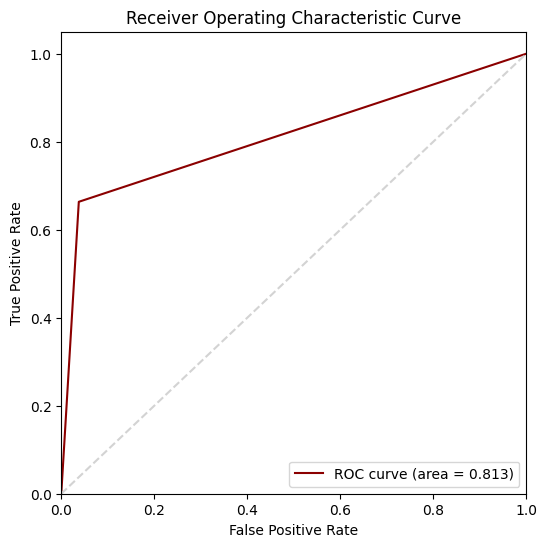

In [43]:
X_train_a = augmented.drop('FraudFound_P', axis = 1)
y_train_a = augmented['FraudFound_P']

xgbr_2 = XGBClassifier(
    random_state = 1,
    n_jobs = -1,
    scale_pos_weight = 20,
    eval_metric = 'logloss'
)
xgbr_2.fit(X_train_a, y_train_a)
eval_result(xgbr_2, X_val, y_val, validation = True)


Which metric should we look at in priority?

### SMOTE

In [39]:
from imblearn.over_sampling import SMOTE


               precision    recall  f1-score   support

   Not Fraud       0.97      0.96      0.96      3183
       Fraud       0.44      0.50      0.47       208

    accuracy                           0.93      3391
   macro avg       0.71      0.73      0.72      3391
weighted avg       0.93      0.93      0.93      3391
 



,Predicted Not Fraud,Predicted Fraud
Not Fraud,3054,129
Fraud,105,103


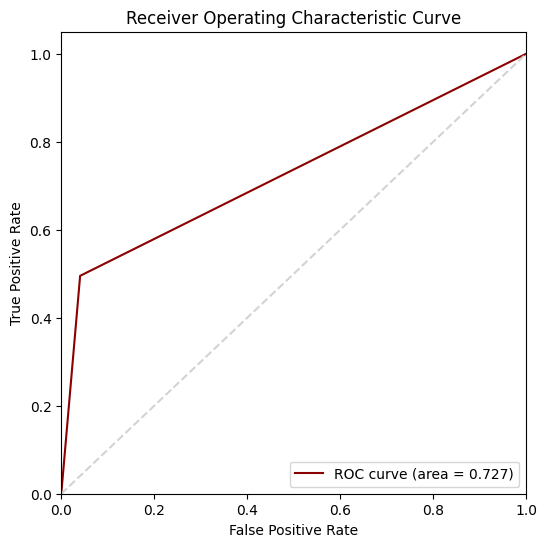

In [40]:
X = data.drop("FraudFound_P", axis = 1)
y = data["FraudFound_P"]

# we create the smote object (upsampling)
sm = SMOTE(random_state=42)

#upsampling the minority class
X_upsampled, y_upsampled = sm.fit_resample(X, y)

xgbr_3 = XGBClassifier(
    random_state = 1,
    n_jobs = -1,
    scale_pos_weight = 20,
    eval_metric = 'logloss'
)
xgbr_3.fit(X_upsampled, y_upsampled)
eval_result(xgbr_3, X_val, y_val, validation = True)

#Clustering

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

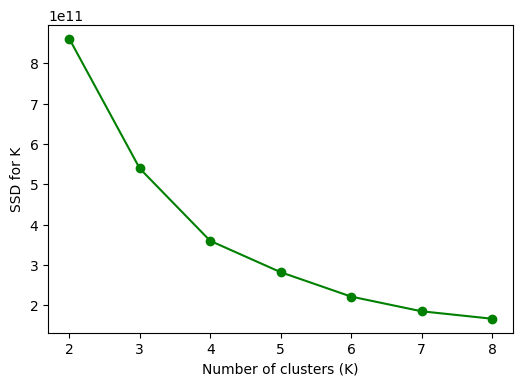

In [ ]:
from sklearn.cluster import KMeans
import statsmodels.api as sm
import matplotlib.pyplot as plt

#clustering for the original dataset
ssd = []
for k in range(2, 9):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(data)
    ssd.append(kmeans_model.inertia_)

plt.figure(figsize=(6, 4), dpi=100)
plt.plot(range(2, 9), ssd, color="green", marker="o")
plt.xlabel("Number of clusters (K)")
plt.ylabel("SSD for K")
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

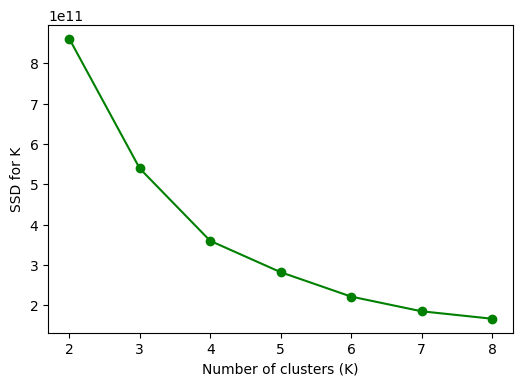

In [ ]:
#clustering for augmented dataset
ssd_a = []
for k in range(2, 9):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(augmented[augmented.columns[:-1]])
    ssd_a.append(kmeans_model.inertia_)

plt.figure(figsize=(6, 4), dpi=100)
plt.plot(range(2, 9), ssd, color="green", marker="o")
plt.xlabel("Number of clusters (K)")
plt.ylabel("SSD for K")
plt.show()

In [ ]:
kmeans_model_opt = KMeans(n_clusters=4)
clusters = kmeans_model_opt.fit_predict(data)
cluster_data = data
cluster_data['cluster'] = clusters

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans_model_opt = KMeans(n_clusters=4)
clusters_a = kmeans_model_opt.fit_predict(augmented[augmented.columns[:-1]])
cluster_data_a = augmented
cluster_data_a['cluster'] = clusters_a

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cluster_data_a

,dum: WitnessPresent: Yes,dum: VehicleCategory: Utility,dum: VehicleCategory: Sport,dum: Sex: Male,dum: PolicyType: Utility - Liability,dum: PolicyType: Utility - Collision,dum: PolicyType: Utility - All Perils,dum: PolicyType: Sport - Liability,dum: PolicyType: Sport - Collision,dum: PolicyType: Sport - All Perils,dum: PolicyType: Sedan - Liability,dum: PolicyType: Sedan - Collision,dum: PoliceReportFiled: Yes,dum: PastNumberOfClaims: none,dum: PastNumberOfClaims: more than 4,dum: PastNumberOfClaims: 2 to 4,dum: NumberOfSuppliments: none,dum: NumberOfSuppliments: more than 5,dum: NumberOfSuppliments: 3 to 5,dum: NumberOfCars: more than 8,dum: NumberOfCars: 5 to 8,dum: NumberOfCars: 3 to 4,dum: NumberOfCars: 2 vehicles,dum: MaritalStatus: Widow,dum: MaritalStatus: Single,dum: MaritalStatus: Married,dum: Make: VW,dum: Make: Toyota,dum: Make: Saturn,dum: Make: Saab,dum: Make: Porche,dum: Make: Pontiac,dum: Make: Nisson,dum: Make: Mercury,dum: Make: Mecedes,dum: Make: Mazda,dum: Make: Lexus,dum: Make: Jaguar,dum: Make: Honda,dum: Make: Ford,dum: Make: Ferrari,dum: Make: Dodge,dum: Make: Chevrolet,dum: Make: BMW,dum: Fault: Third Party,dum: Days_Policy_Claim: more than 30,dum: Days_Policy_Claim: 8 to 15,dum: Days_Policy_Accident: none,dum: Days_Policy_Accident: more than 30,dum: Days_Policy_Accident: 8 to 15,dum: Days_Policy_Accident: 15 to 30,dum: BasePolicy: Liability,dum: BasePolicy: Collision,dum: AgentType: Internal,dum: AddressChange_Claim: under 6 months,dum: AddressChange_Claim: no change,dum: AddressChange_Claim: 4 to 8 years,dum: AddressChange_Claim: 2 to 3 years,dum: AccidentArea: Urban,Year,WeekOfMonthClaimed,WeekOfMonth,VehiclePrice,RepNumber,PolicyNumber,MonthClaimed,Month,FraudFound_P,DriverRating,Deductible,DayOfWeekClaimed,DayOfWeek,ClaimSize,AgeOfVehicle,AgeOfPolicyHolder,Age,synthetic,cluster
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,1995,2,2,3,12,8023,5,5,0,1.0,400,4,4,92790.336713,7.0,5,27.0,0,2
1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1996,1,5,2,11,13594,8,7,0,1.0,400,2,5,3700.314078,7.0,5,32.0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1995,2,2,2,10,11697,4,9,0,2.0,400,2,1,6180.733872,7.0,4,39.0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1994,3,3,3,12,13232,4,6,0,3.0,401,2,5,23736.336432,5.0,6,71.0,1,3
4,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1996,2,4,2,11,13311,5,4,0,1.0,400,3,3,19377.645900,4.0,3,18.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14905,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,1994,5,1,2,9,4122,8,1,0,4.0,400,1,4,22107.822291,8.5,6,31.0,1,3
14906,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1995,4,3,2,11,10927,3,3,0,2.0,400,3,1,3559.680027,7.0,6,37.0,0,0
14907,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,1995,3,3,3,15,6999,9,8,0,1.0,400,1,3,3480.681355,7.0,6,41.0,0,0
14908,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1994,4,2,2,13,4199,5,5,0,4.0,400,5,4,6517.395370,7.0,8,59.0,0,0


In [ ]:
sel = cluster_data_a[cluster_data_a['synthetic']==0]
sel['cluster'].value_counts()

0    5326
1    1312
3     716
2     556
Name: cluster, dtype: int64

In [ ]:
cluster_data['cluster'].value_counts()

0    5225
1    1150
2     793
3     742
Name: cluster, dtype: int64

<Axes: >

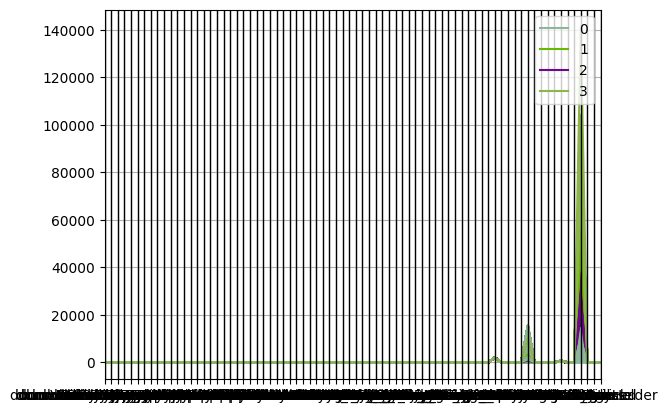

In [ ]:
pd.plotting.parallel_coordinates(cluster_data, 'cluster')

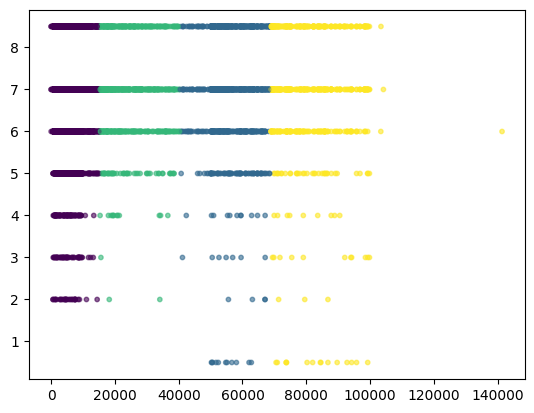

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(cluster_data.ClaimSize, cluster_data.AgeOfVehicle, c=cluster_data.cluster, alpha = 0.6, s=10)

<Axes: >

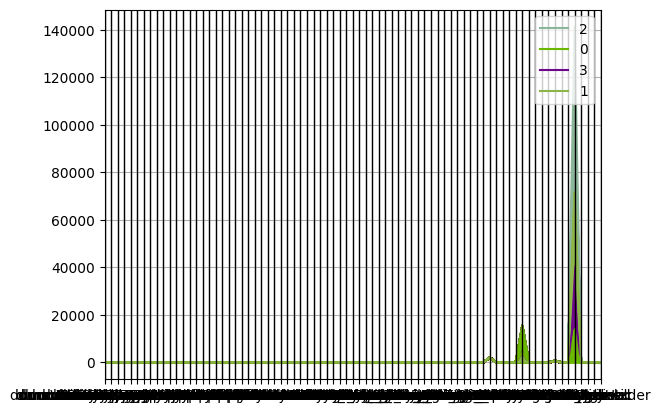

In [ ]:
pd.plotting.parallel_coordinates(cluster_data_a, 'cluster')

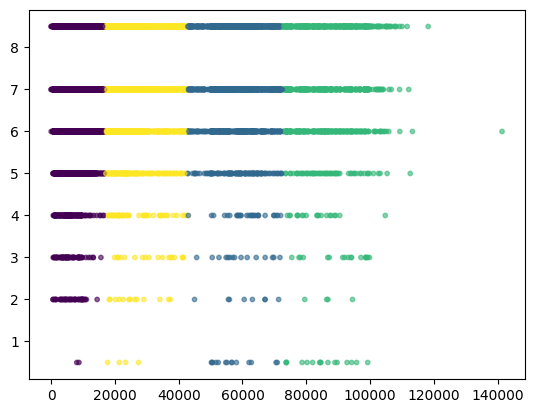

In [ ]:
plt.scatter(cluster_data_a.ClaimSize, cluster_data_a.AgeOfVehicle, c=cluster_data_a.cluster, alpha = 0.6, s=10)

#distribution checks

In [ ]:
! pip install sdmetrics --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.7/140.7 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 KB 6.8 MB/s eta 0:00:00


In [ ]:
data = data[data.columns[:-1]]
augmented = augmented[augmented.columns[:-2]]

In [ ]:
from sdmetrics.reports.single_table import QualityReport

my_metadata = {
  'fields': {},
  'constraints': [],
  'model_kwargs': {},
  'name': None,
  'primary_key': None,
  'sequence_index': None,
  'entity_columns': [],
  'context_columns': []
}

dict_int = {'type': 'numerical', 'subtype': 'integer'}
dict_float = {'type': 'numerical', 'subtype': 'float'}

for l in list(data):
  if (data[l].dtype == 'uint8') or (data[l].dtype == int):
    my_metadata['fields'][l] = dict_int
  if data[l].dtype == 'float64':
    my_metadata['fields'][l] = dict_float
    
report = QualityReport()
report.generate(data, augmented, my_metadata)

Creating report:  25%|██▌       | 1/4 [00:00<00:01,  1.67it/s]/usr/local/lib/python3.9/dist-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/sdmetrics/column_pairs/statistical/correlation_similarity.py:60: ConstantInputWarning: One or both of the input arrays is constant. The CorrelationSimilarity metric is either undefined or infinite.
  warnings.warn(ConstantInputWarning(msg))
/usr/local/lib/python3.9/dist-packages/sdmetrics/column_pairs/statistical/correlation_similarity.p


Overall Quality Score: 98.14%

Properties:
Column Shapes: 97.51%
Column Pair Trends: 98.77%


In [ ]:
detail_report = report.get_details(property_name='Column Shapes')

In [ ]:
detail_report

,Column,Metric,Quality Score
0,dum: WitnessPresent: Yes,KSComplement,0.999586
1,dum: VehicleCategory: Utility,KSComplement,0.996681
2,dum: VehicleCategory: Sport,KSComplement,0.985229
3,dum: Sex: Male,KSComplement,0.988614
4,dum: PolicyType: Utility - Liability,KSComplement,0.999580
...,...,...,...
71,DayOfWeek,KSComplement,0.954052
72,ClaimSize,KSComplement,0.883899
73,AgeOfVehicle,KSComplement,0.913219
74,AgeOfPolicyHolder,KSComplement,0.914961


In [ ]:
detail_report[detail_report['Quality Score']<0.9]

,Column,Metric,Quality Score
69,Deductible,KSComplement,0.851516
72,ClaimSize,KSComplement,0.883899


### Next Steps


- Similarity checks (clustering, PCA, similarity measures for distribution correlation etc...)
- Improving precision & recall by changing parameters in the synthetic data generation process
- Think about inclusing upsampling in the synthetic data generation library (with a parameters = TRUE if we want to upsample data)